<a href="https://colab.research.google.com/github/niharikamanjunatha/Image_Classifier/blob/main/Minor_Project_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [17]:
from google.colab import drive
datadir = '/content/drive/MyDrive/image_classify'

categories = ['pikachu', 'mickey mouse']
images = []
target = []
flat_data = []

for i in categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_arr = imread(os.path.join(path, img))
        img_resize = resize(img_arr, (225,225,3))
        flat_data.append(img_resize.flatten())
        images.append(img_resize)
        target.append(i)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [18]:
flat_data[0]

array([0.70590276, 0.70590276, 0.70590276, ..., 0.70588235, 0.70588235,
       0.70588235])

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state = 43)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

grid_param = {'C': [1,10,100,1000], 'kernel':['linear','rbf']}

svc = svm.SVC(probability = True)
model = GridSearchCV(svc, grid_param)
model.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array(['pikachu', 'pikachu', 'pikachu', 'pikachu', 'mickey mouse',
       'mickey mouse', 'mickey mouse', 'pikachu', 'pikachu',
       'mickey mouse', 'pikachu', 'pikachu', 'mickey mouse', 'pikachu',
       'mickey mouse', 'pikachu', 'pikachu', 'pikachu', 'mickey mouse',
       'mickey mouse', 'pikachu', 'pikachu', 'mickey mouse',
       'mickey mouse', 'pikachu', 'mickey mouse', 'mickey mouse',
       'mickey mouse', 'pikachu', 'pikachu'], dtype='<U12')

In [23]:
y_test

array(['pikachu', 'pikachu', 'pikachu', 'pikachu', 'mickey mouse',
       'mickey mouse', 'mickey mouse', 'mickey mouse', 'pikachu',
       'mickey mouse', 'pikachu', 'pikachu', 'mickey mouse', 'pikachu',
       'mickey mouse', 'pikachu', 'pikachu', 'pikachu', 'mickey mouse',
       'mickey mouse', 'pikachu', 'pikachu', 'mickey mouse',
       'mickey mouse', 'pikachu', 'mickey mouse', 'mickey mouse',
       'mickey mouse', 'mickey mouse', 'pikachu'], dtype='<U12')

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.9333333333333333

In [25]:
confusion_matrix(y_test,y_pred)

array([[13,  2],
       [ 0, 15]])

In [26]:
import pickle

pickle.dump(model, open('img_model.p','wb'))

In [27]:
load_model = pickle.load(open('img_model.p','rb'))

Enter the URLhttps://i.pinimg.com/736x/1a/96/37/1a96375855453b02c95f154fa60518d2.jpg
PREDICTED OUTPUT : ['pikachu']


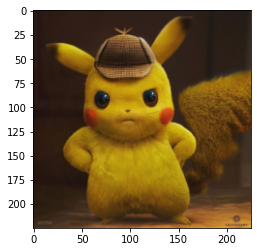

In [29]:
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resize = resize(img, (225,225,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resize)
y_out = load_model.predict(flat_data)
print(f'PREDICTED OUTPUT : {y_out}')